In [44]:

# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
#instantiate load_boston function
boston = load_boston()

# print(boston.data)
# print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [46]:
# from Eric Botcher; description of Boston data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
# boston dataframe
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Attributes
#### - CRIM  per capita crime rate by town
#### - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#### - INDUS    proportion of non-retail business acres per town
#### - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### - NOX      nitric oxides concentration (parts per 10 million)
#### - RM       average number of rooms per dwelling
#### - AGE      proportion of owner-occupied units built prior to 1940
#### - DIS      weighted distances to five Boston employment centres
#### - RAD      index of accessibility to radial highways
#### - TAX      full-value property-tax rate per 10,000 dollars
#### - PTRATIO  pupil-teacher ratio by town
#### - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### - LSTAT    % lower status of the population
#### - PRICE     Median value of owner-occupied homes in 1000's of dollars

# Lets plot some of the features and try to fit them to a curve
## Price, Pupil-Teacher Ratio, Black Population and Crime

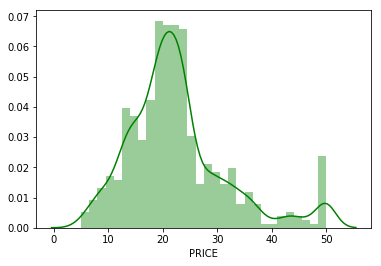

In [81]:
# Here is the general distribution of housing prices 
sns.distplot(bos.PRICE, bins=30, kde=True, color="green")
plt.show()

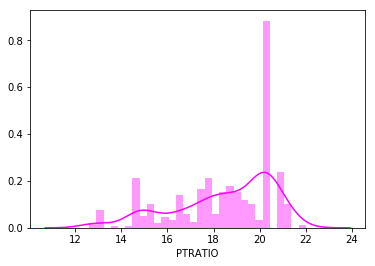

In [82]:
# We can see that in most places the pupil teacher ratio is about 20 to 1
sns.distplot(bos.PTRATIO, bins=30, kde=True, color="magenta")
plt.show()

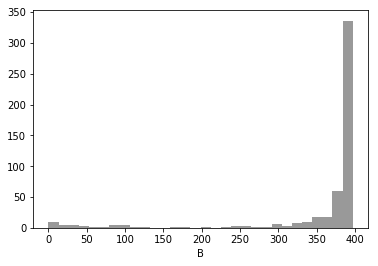

In [83]:
# This likely shows some segregation. 
# Many areas with very low black populations and few areas with very high black populations.
# I turned off KDE here because it distorted the data too much
sns.distplot(bos.B, bins=30, kde=False, color="black")
plt.show()

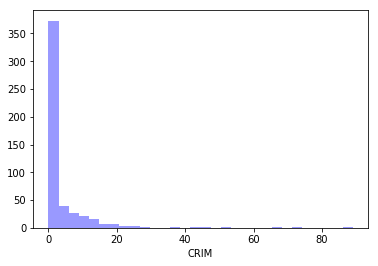

In [84]:
# Again no KDE for this plot
sns.distplot(bos.CRIM, bins=30, kde=False, color="blue")
plt.show()

# Let's look at: 

### 1) Crime rates vs property tax values
### 2) Crime rates vs. median house prices 
### 3) Median house prices vs. number of rooms
### 4) Housing Prices vs. Lower status residents
### 5) Crime per capita vs. Large Houses

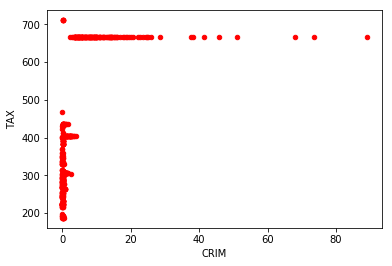

In [94]:
# Crime vs Tax 
bos.plot.scatter(x="CRIM", y="TAX", c="red")


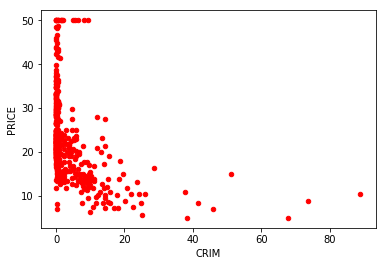

In [95]:
# It looks like lower rates of crime generally happen with lower housing values
bos.plot.scatter(x="CRIM", y="PRICE", c="red")

In [96]:
# rounding number of rooms to nearest int 
plot_bos = bos.round({'RM': 0})

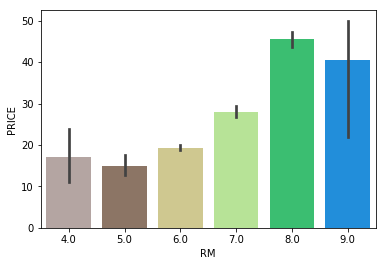

In [97]:
# we can see that generally, more expensive homes have more rooms
sns.barplot(x='RM', y='PRICE', palette='terrain_r', data=plot_bos)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


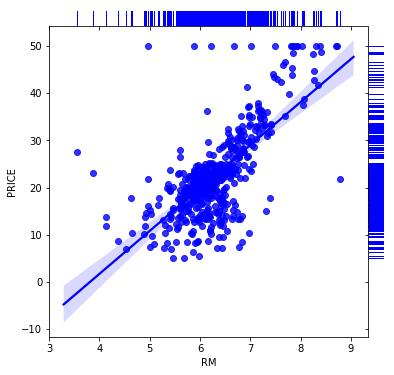

In [119]:
grid = sns.JointGrid(x='RM', y='PRICE', data=bos, space=0, size=6, ratio=20)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=2)
plt.show()

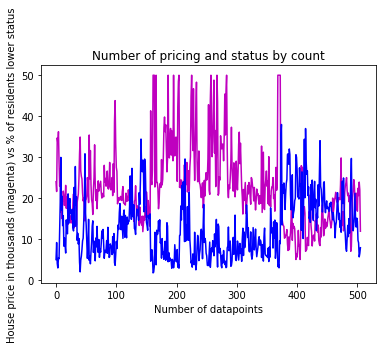

In [98]:
# Plotting all the house prices vs % of residents lower class
plt.plot(bos.index, bos.PRICE, 'm') # range 5-50 mean 22.5 
plt.plot(bos.index, bos.LSTAT, 'b') # range 1.7 to 38 mean 12.7
plt.title('Number of pricing and status by count')
plt.ylabel('House price in thousands (magenta) vs % of residents lower status');
plt.xlabel('Number of datapoints');

# we can see divergence between higher housing prices and % of residents who are lower class

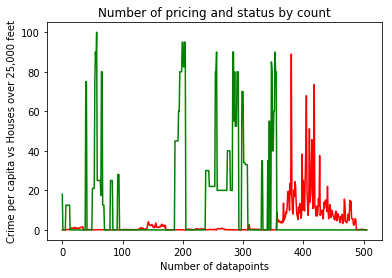

In [99]:
plt.plot(bos.index, bos.CRIM, 'r')
plt.plot(bos.index, bos.ZN, 'g') 
plt.title('Number of pricing and status by count')
plt.ylabel('Crime per capita vs Houses over 25,000 feet');
plt.xlabel('Number of datapoints');

# we can see that all of the elevated crime is in areas where there are very few houses zoned at over 25,000 feet

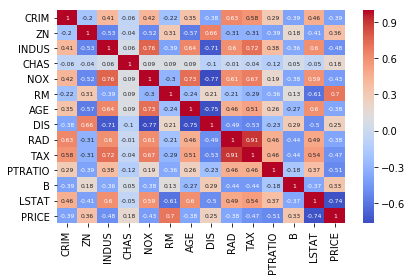

In [120]:
sns.heatmap(data=bos.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":6})
plt.tight_layout()
plt.show()

In [121]:
# Bring in Linear Regression tools
from sklearn.linear_model import LinearRegression

In [144]:
# create an array for features
feature_cols = ["RM"]

# Designate X and y values
X_train = bos[feature_cols][:380]
Y_train = bos.PRICE[:380]


In [174]:
lr_reg = LinearRegression() # instantiate LinearRegression class
lr_reg.fit(X_train, Y_train) # obtain line of best fit


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
print(lr_reg.coef_)
print(lr_reg.intercept_)

[9.22746282]
-33.76671940428007


In [176]:
X_test = bos[feature_cols][126:]
Y_test = bos.PRICE[126:]

In [177]:
lr_reg.predict(X_test).round(4)

array([18.027 , 18.7652, 25.5751, 18.2485, 25.8242, 24.6062, 25.0307,
       19.9556, 19.3558, 24.6893, 21.0629, 25.7873, 20.2785, 22.9914,
       23.2036, 12.5459, 16.0893, 16.689 , 11.4755, 22.7976, 18.1654,
       11.6878, 14.0869, 17.8794, 22.7238, 16.0985, 12.4813, 18.9129,
       22.7884, 23.0006, 14.8805, 30.2996, 22.2071, 26.3041, 23.9049,
       35.3377, 38.2259, 43.5133, 20.2508, 22.53  , 39.3978, 20.4631,
       24.5416, 25.3075, 20.4446, 20.4908, 17.6487, 25.4367, 20.297 ,
       26.6363, 21.7826, 24.5047, 29.5337, 30.641 , 37.8845, 22.9268,
       32.2558, 26.7931, 17.944 , 23.0099, 38.4935, 28.8139, 26.7285,
       32.5326, 30.3734, 28.4172, 32.468 , 28.98  , 27.1714, 38.8996,
       33.4738, 31.8129, 33.3538, 30.5948, 32.0712, 23.0929, 36.4543,
       38.6965, 40.3667, 20.5923, 24.6062, 19.5957, 22.1886, 15.5448,
       21.229 , 16.0985, 19.8172, 25.0584, 16.1723, 23.2775, 20.5646,
       27.5221, 21.1459, 25.0399, 30.3734, 23.1114, 29.709 , 27.3006,
       42.5075, 46.7

In [178]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [179]:
# Returns the coefficient of determination R^2 of the prediction.
lr_reg.score(X_test, Y_test)

0.4342176567545745

In [180]:
print("R squared result for RM vs PRICE:")
r2_score(Y_test, lr_reg.predict(X_test))

R squared result for RM vs PRICE:


0.43421765675457447

In [181]:
print("Mean squared error for RM vs PRICE:")
mean_squared_error(Y_test, lr_reg.predict(X_test)) # doesn't seem right

Mean squared error for RM vs PRICE:


58.00791533065862

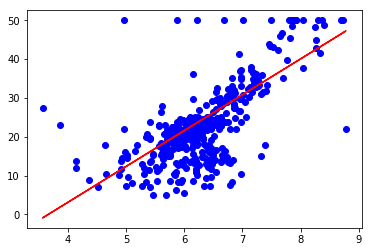

In [192]:
plt.scatter(X_test, Y_test,  color='b')
plt.plot(X_test, lr_reg.predict(X_test), color='r')

plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


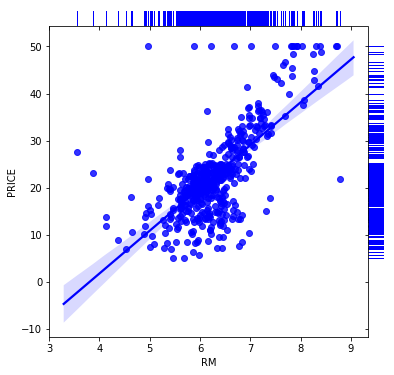

In [191]:
# Another way to plot the same data
grid = sns.JointGrid(x='RM', y='PRICE', data=bos, space=0, size=6, ratio=20)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=2)
plt.show()